## Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [4]:
data=pd.read_csv(r"C:\Users\bnith\Downloads\netflix1.csv")
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


## Importing data from csv and getting info about data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [7]:
data.shape

(8790, 10)

## Identify and handle missing data, correct data types, and drop duplicates

In [9]:
data=data.drop_duplicates()

In [10]:
print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [11]:
data['date_added'] = pd.to_datetime(data['date_added'])
print(data.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


In [12]:
type_counts = data['type'].value_counts()

# Exploratory Data Analysis (EDA)

## Content distribution on Netflix

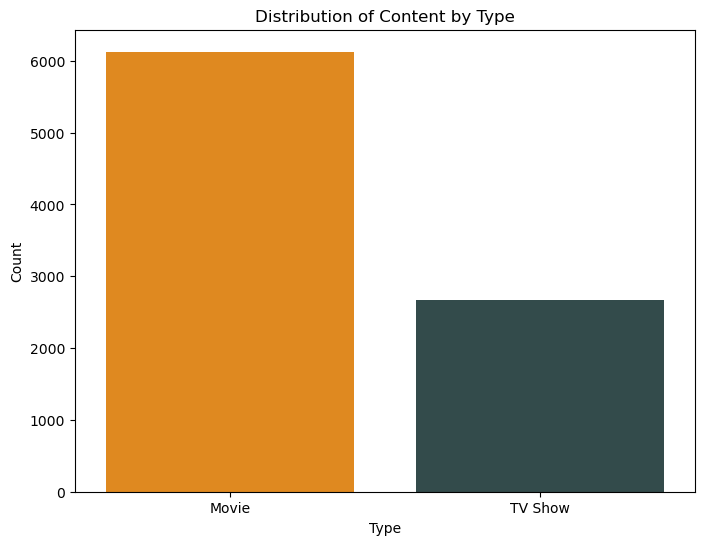

In [15]:
plt.figure(figsize=(8, 6))
colors=['darkorange','darkslategrey']
sns.barplot(x=type_counts.index, y=type_counts.values,hue=type_counts.index,palette=colors)
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

## Most Common Genres

In [17]:
data['genres'] = data['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

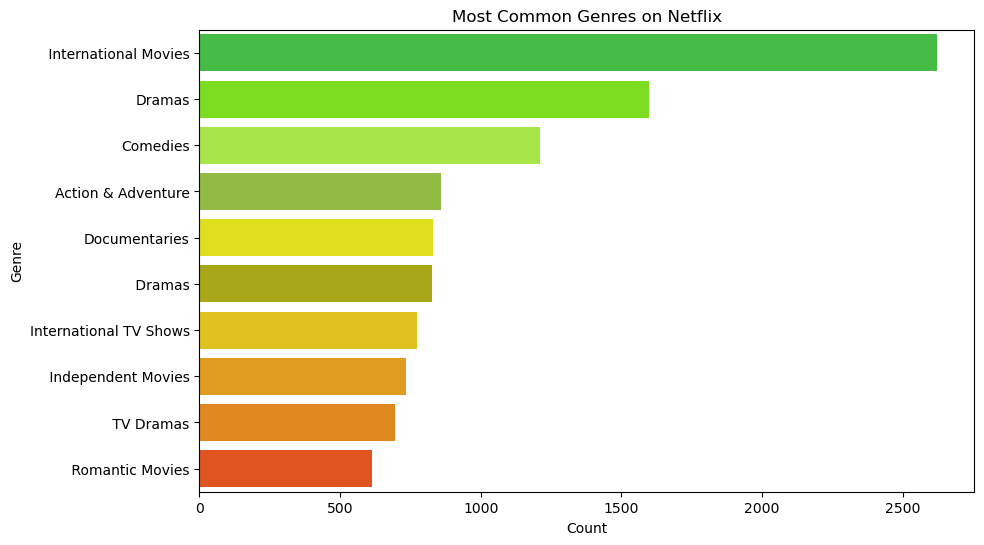

In [18]:
plt.figure(figsize=(10, 6))
colors=['limegreen','lawngreen','greenyellow','yellowgreen','yellow','y','gold','orange','darkorange','orangered']
sns.barplot(x=genre_counts.values, y=genre_counts.index,hue=genre_counts.index,
palette=colors)
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

## Content Added Over Time

In [20]:
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

C:\Users\bnith\AppData\Local\Temp\ipykernel_9752\372327368.py:3: UserWarning: 
The palette list has fewer values (7) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='year_added',hue='year_added', data=data, palette=colors)


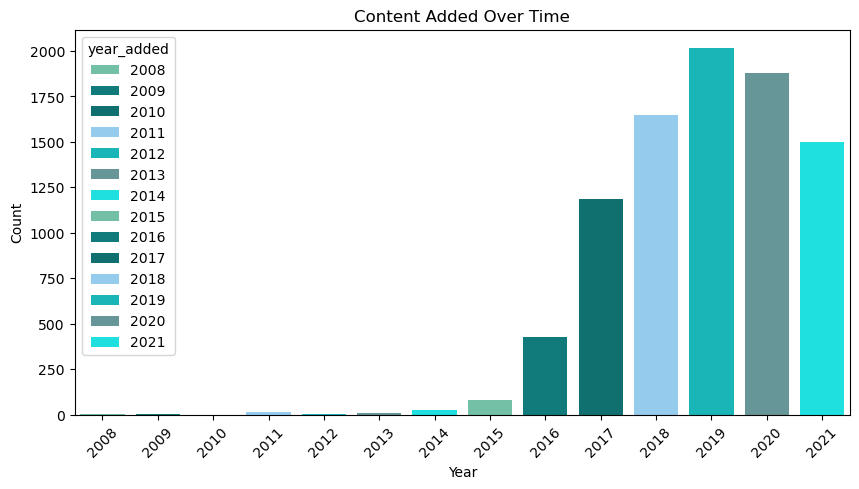

In [21]:
plt.figure(figsize=(10, 5))
colors=['mediumaquamarine','darkcyan','teal','lightskyblue','darkturquoise','cadetblue','aqua',]
sns.countplot(x='year_added',hue='year_added', data=data, palette=colors)
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Rating frequency of movies and TV Shows on Netflix

In [23]:
data['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

Text(0.5, 0.98, 'Rating on Netflix')

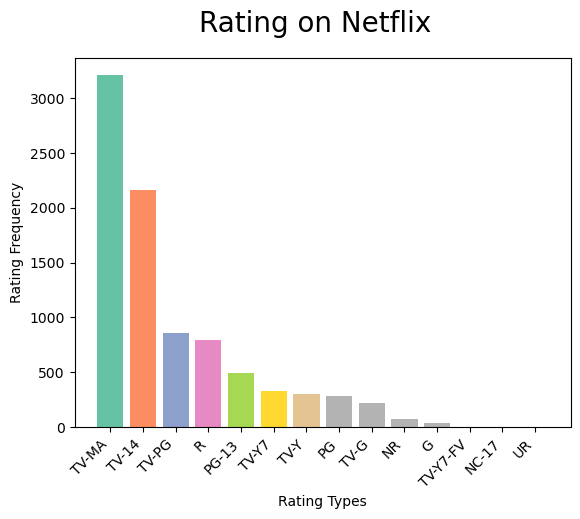

In [24]:
ratings=data['rating'].value_counts().reset_index().sort_values(by='count',
ascending=False)
colors = plt.cm.Set2(range(len(ratings)))
plt.bar(ratings['rating'], ratings['count'],color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.suptitle('Rating on Netflix', fontsize=20)

## Top 10 countries with most content on Netflix

In [26]:
data['country'].value_counts()

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64

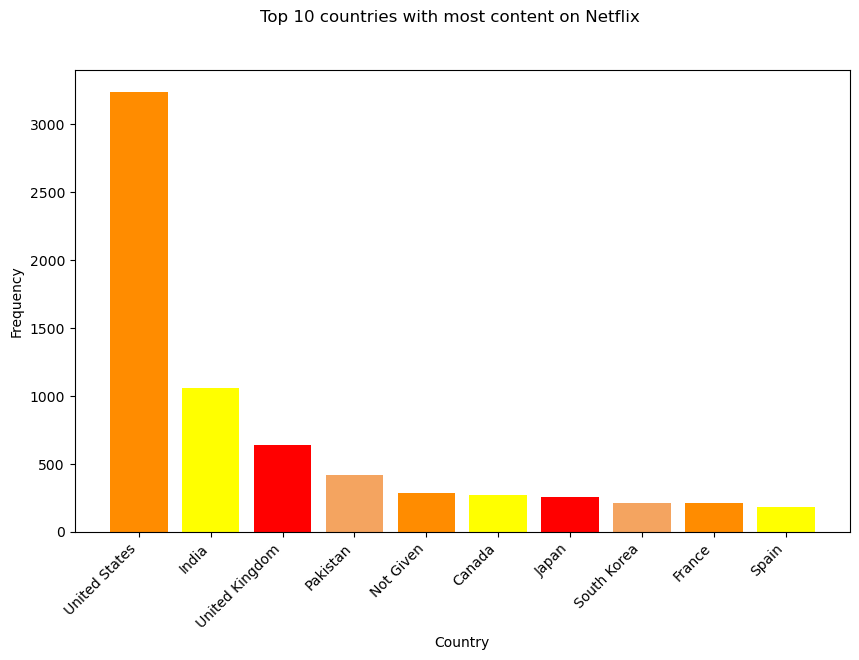

In [27]:
top_ten_countries=data['country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]
plt.figure(figsize=(10, 6))
colors=['darkorange','yellow','red','sandybrown']
plt.bar(top_ten_countries['country'], top_ten_countries['count'],color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle("Top 10 countries with most content on Netflix")
plt.show()

In [28]:
data['year']=data['date_added'].dt.year
data['month']=data['date_added'].dt.month
data['day']=data['date_added'].dt.day

## Monthly releases of Movies and TV shows on Netflix

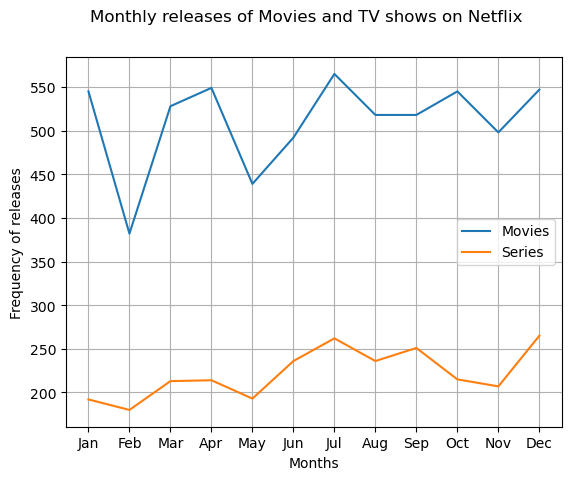

In [30]:
monthly_movie_release=data[data['type']=='Movie']['month'].value_counts().sort_index()
monthly_series_release=data[data['type']=='TV Show']['month'].value_counts().sort_index()
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies')
plt.plot(monthly_series_release.index, monthly_series_release.values,
label='Series')
plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV shows on Netflix")
plt.show()

## Yearly releases of Movies and TV Shows on Netflix

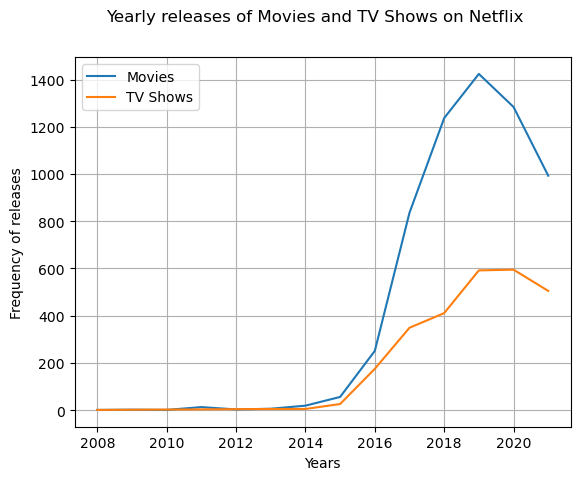

In [32]:
yearly_movie_releases=data[data['type']=='Movie']['year'].value_counts().sort_index()
yearly_series_releases=data[data['type']=='TV Show']['year'].value_counts().sort_index()
plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, label='Movies')
plt.plot(yearly_series_releases.index, yearly_series_releases.values, label='TV Shows')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix")
plt.legend()

## Top 10 popular movie genres

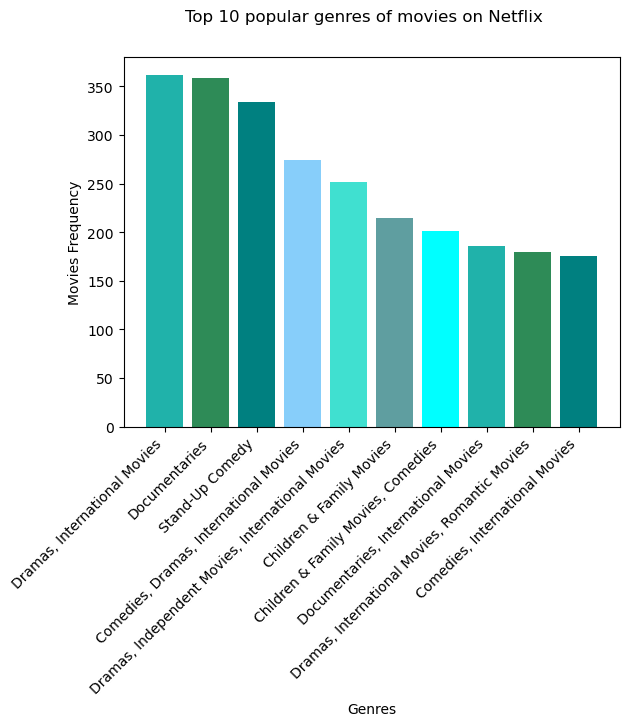

In [34]:
popular_movie_genre=data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_series_genre=data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]
colors=['lightseagreen','seagreen','teal','lightskyblue','turquoise','cadetblue','aqua',]
plt.bar(popular_movie_genre.index, popular_movie_genre.values,color=colors[:len(ratings)])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 popular genres of movies on Netflix")
plt.show()

## Top 10 TV Shows genres

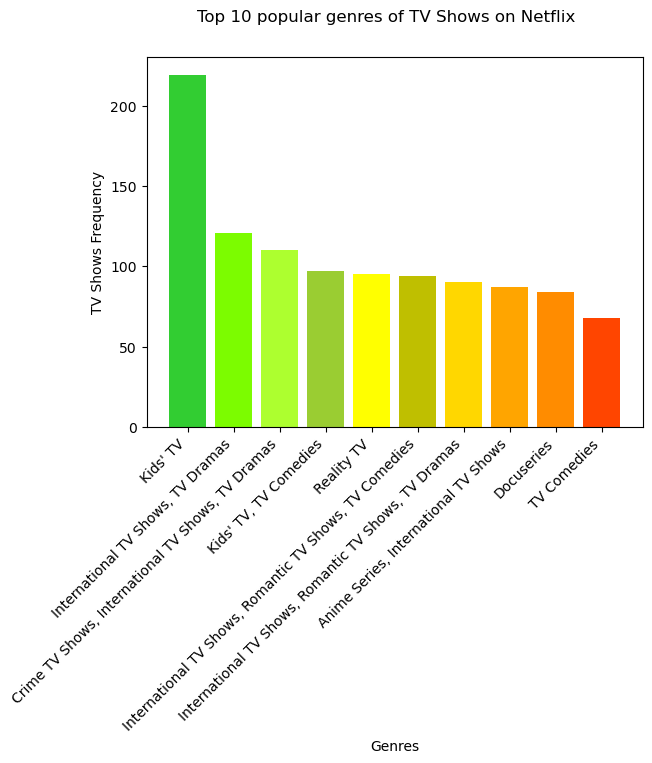

In [36]:
colors=['limegreen','lawngreen','greenyellow','yellowgreen','yellow','y','gold','orange','darkorange','orangered']
plt.bar(popular_series_genre.index, popular_series_genre.values,color=colors[:len(ratings)])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("TV Shows Frequency")
plt.suptitle("Top 10 popular genres of TV Shows on Netflix")
plt.show()

## Top 10 directors across Netflix with high frequency of movies and shows

Text(0, 0.5, 'frequency')

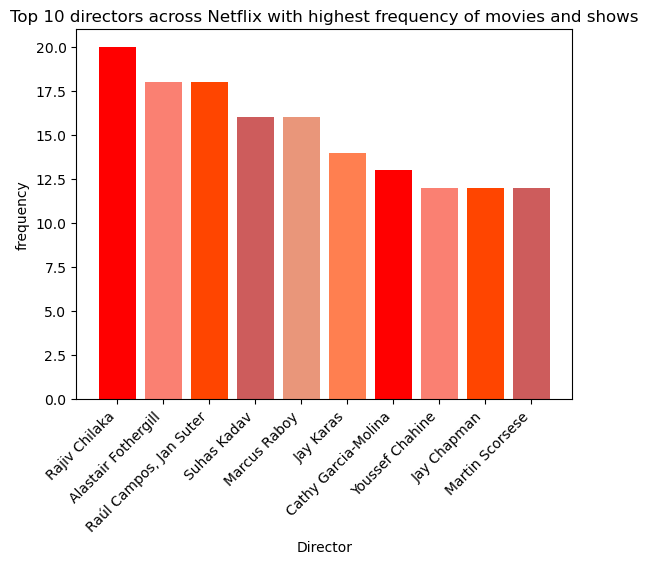

In [38]:
directors=data['director'].value_counts().reset_index().sort_values(by='count',ascending=False)[1:11]
colors=['red','salmon','orangered','indianred','darksalmon','coral']
plt.bar(directors['director'], directors['count'],color=colors[:len(ratings)])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 directors across Netflix with highest frequency of movies and shows')
plt.xlabel('Director')
plt.ylabel('frequency')
